In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from sklearn import linear_model


# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

/home/irfanalidv/anaconda2/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['FB','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)
        
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

#Creating a Date column    
GOOG['Date']=GOOG.index
MSFT['Date']=MSFT.index
AMZN['Date']=AMZN.index
FB['Date']=FB.index

In [4]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,743.744228,749.456998,737.616649,743.519842,1830697.233202,743.519842
std,34.716221,33.753775,35.404010,34.372472,934188.965470,34.372472
min,667.849976,672.299988,663.059998,668.260010,586000.000000,668.260010
25%,716.099976,720.000000,706.479980,713.309998,1269700.000000,713.309998
50%,743.020020,747.179993,737.000000,742.950012,1585300.000000,742.950012
75%,773.450012,778.549988,768.409973,772.559998,2076300.000000,772.559998
max,816.679993,816.679993,805.140015,813.109985,6348100.000000,813.109985


In [3]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-29 to 2016-12-28
Data columns (total 7 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
Date         253 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.8 KB


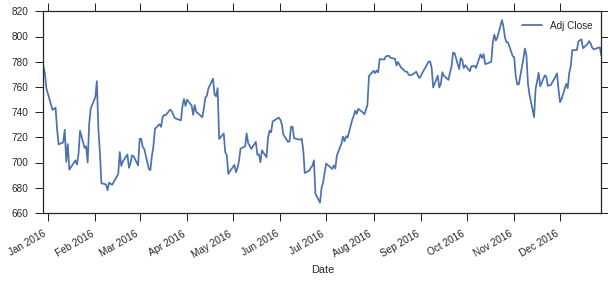

In [5]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

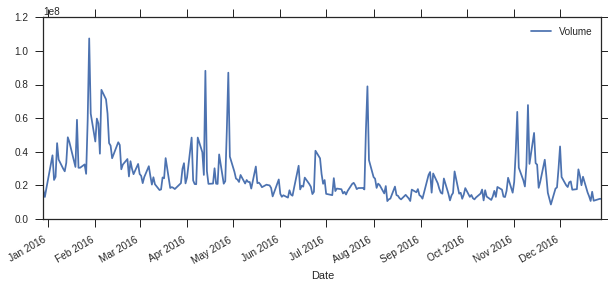

In [6]:
FB['Volume'].plot(legend=True,figsize=(10,4))

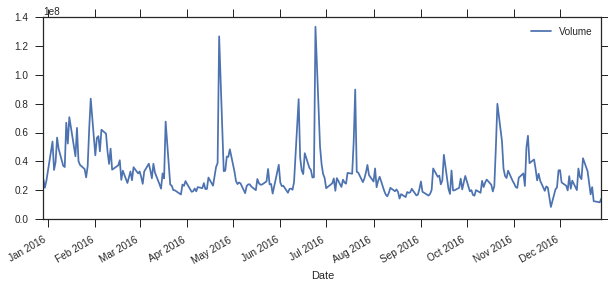

In [7]:
MSFT['Volume'].plot(legend=True,figsize=(10,4))

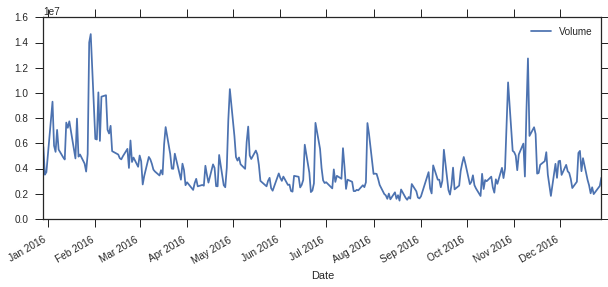

In [8]:
AMZN['Volume'].plot(legend=True,figsize=(10,4))

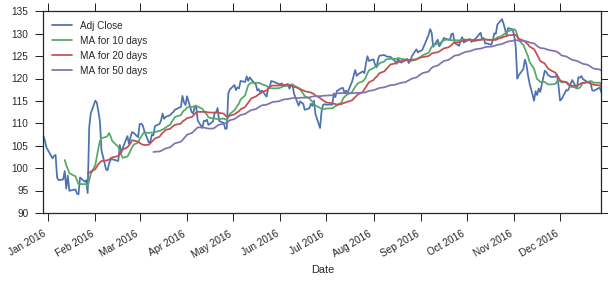

In [9]:
#plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    FB[column_name]=pd.rolling_mean(FB['Adj Close'],ma)

FB[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

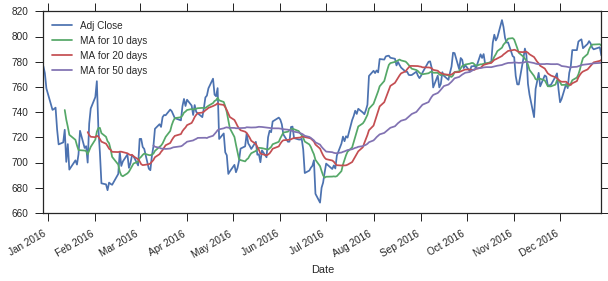

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name]=pd.rolling_mean( GOOG['Adj Close'],ma)

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

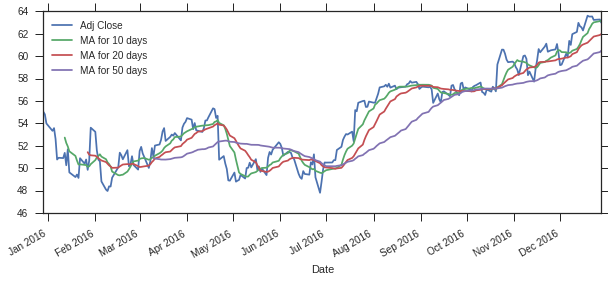

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name]=pd.rolling_mean(MSFT['Adj Close'],ma)

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

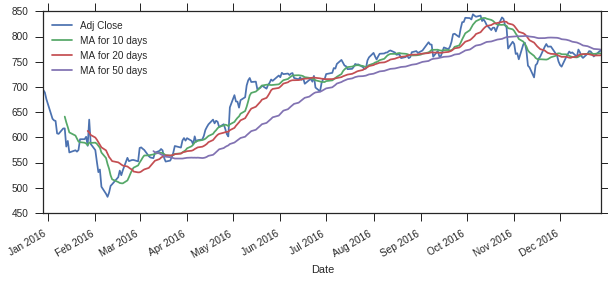

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AMZN[column_name]=pd.rolling_mean(AMZN['Adj Close'],ma)

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

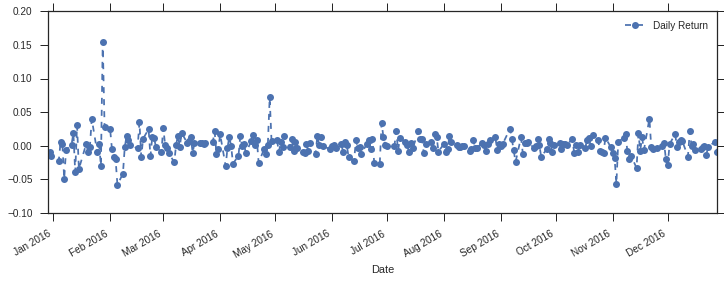

In [13]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
FB['Daily Return'] = FB['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
FB['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

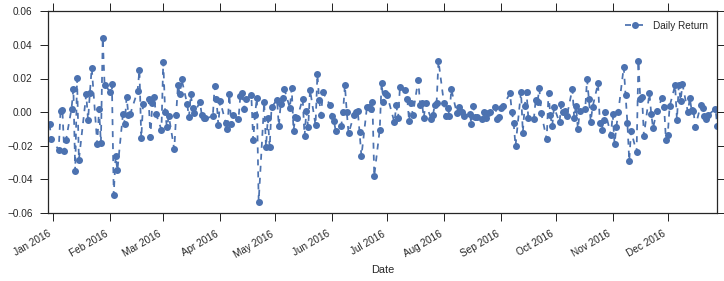

In [14]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

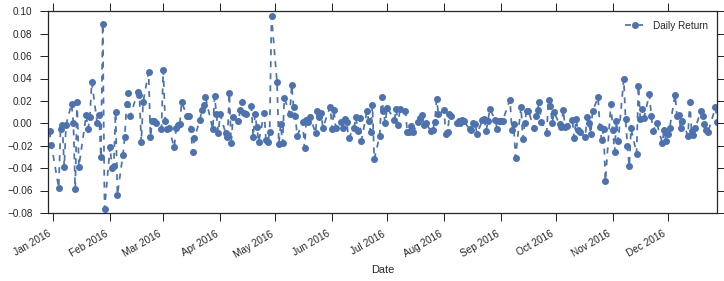

In [15]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AMZN['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

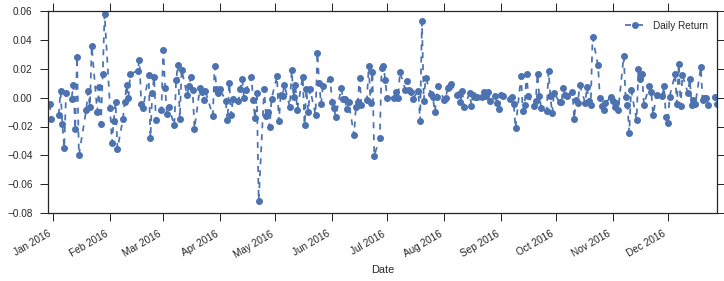

In [16]:
#daily return analysis
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

In [17]:
#an overall look at the average daily return using a histogram.
#We'll use seaborn to create both a histogram and kde plot on the same figure.


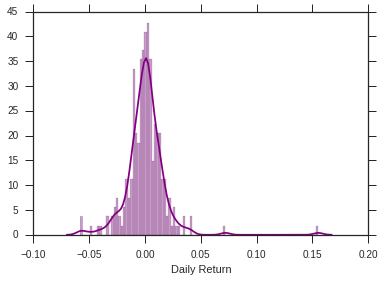

In [18]:
sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

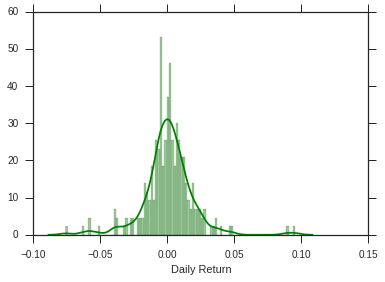

In [19]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='Green')

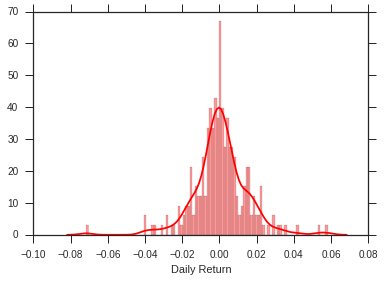

In [20]:
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='red')

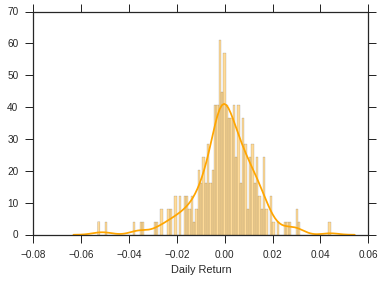

In [21]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='orange')

In [22]:
#printing correlation coefficient between GOOGLE and MSFT 
np.corrcoef(
    GOOG['Adj Close'],MSFT['Adj Close'])

array([[ 1.        ,  0.90630063],
       [ 0.90630063,  1.        ]])

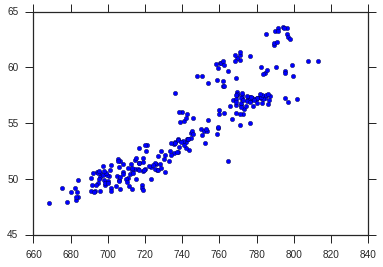

In [23]:

#plotting the relation between values of adjacent close of GOOGLE and MICROSOFT stock
plt.scatter(GOOG['Adj Close'],MSFT['Adj Close'])


('Coefficients: \n', array([[ 0.08979949]]))
Mean squared error: 14.79
Variance score: -2.98


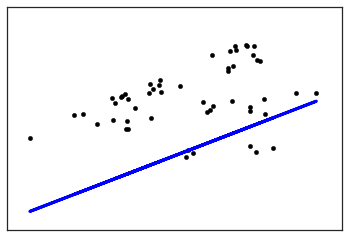

In [24]:
#We are finding the linear regression between GOOG and MSFT

# Split the data into training sets
x_train=GOOG['Adj Close'][:200]
y_train=MSFT['Adj Close'][:200]

# Split the data into testing sets
x_test=GOOG['Adj Close'][200:]
y_test=MSFT['Adj Close'][200:]


# Create linear regression object
regr = linear_model.LinearRegression()

x_train=x_train.reshape((200,1))
y_train=y_train.reshape((200,1))
# Train the model using the training sets
regr.fit(x_train, y_train)

x_test=x_test.reshape((len(x_test),1))
y_test=y_test.reshape((len(y_test),1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, regr.predict(x_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [25]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['FB','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [26]:
closing_df.head()

,AMZN,FB,GOOG,MSFT
Date,,,,
2015-12-29,693.969971,107.260002,776.599976,55.039699
2015-12-30,689.070007,106.220001,771.000000,54.806110
2015-12-31,675.890015,104.660004,758.880005,53.998276
2016-01-04,636.989990,102.220001,741.840027,53.336436
2016-01-05,633.789978,102.730003,742.580017,53.579760


In [27]:
tech_rets = closing_df.pct_change()

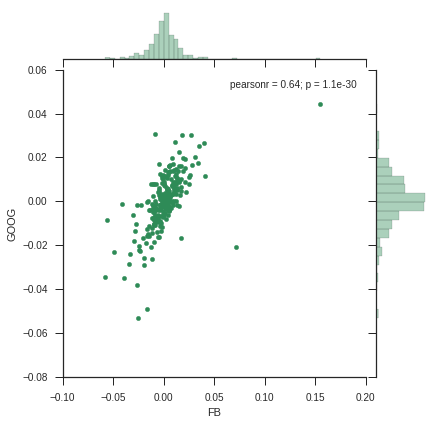

In [28]:
# Comparing Google to FB should 
sns.jointplot('FB','GOOG',tech_rets,kind='scatter',color='seagreen')

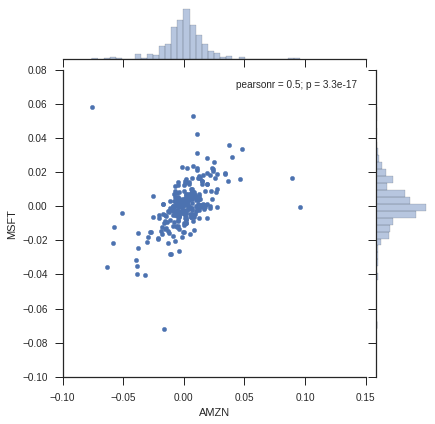

In [29]:
#use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot('AMZN','MSFT',tech_rets,kind='scatter')

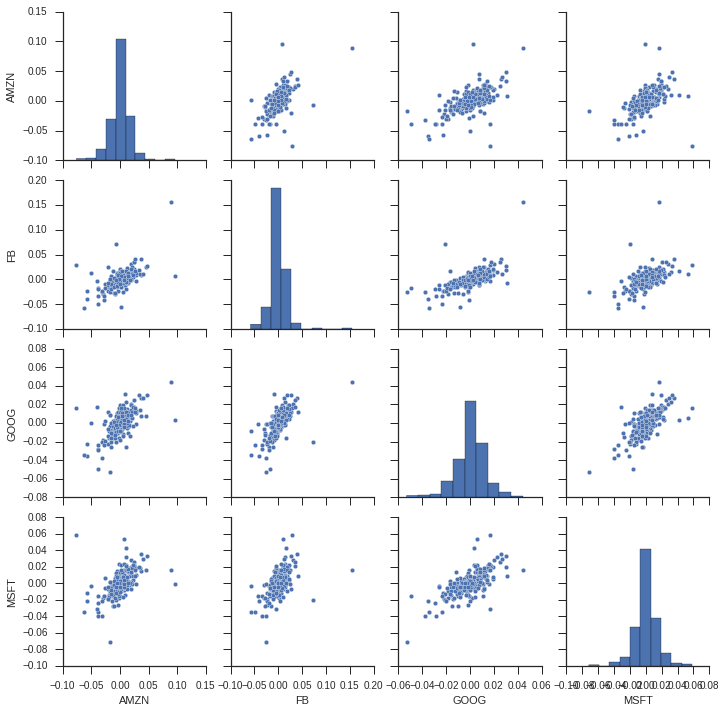

In [30]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

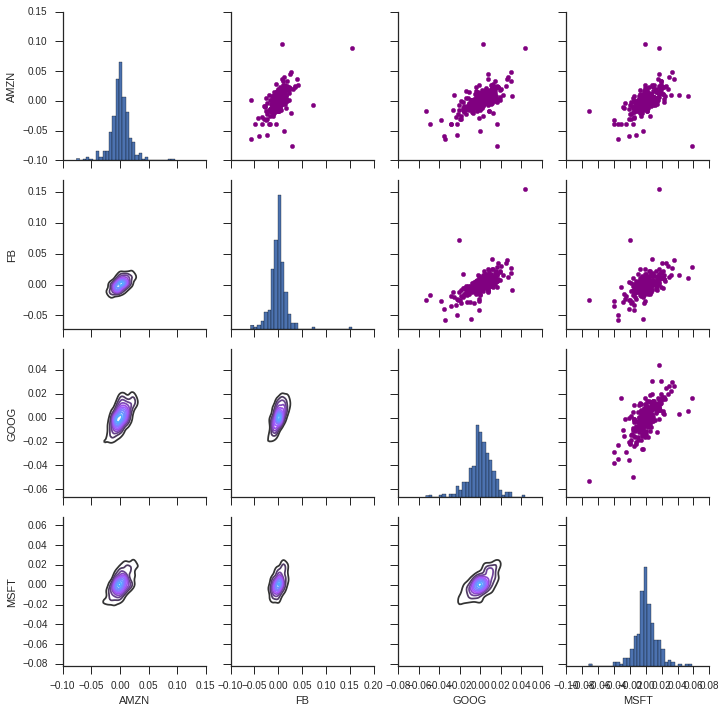

In [31]:
#sns.PairGrid() for full control of the figure, including what kind of plots go 
#in the diagonal, the upper triangle, and the lower triangle.

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

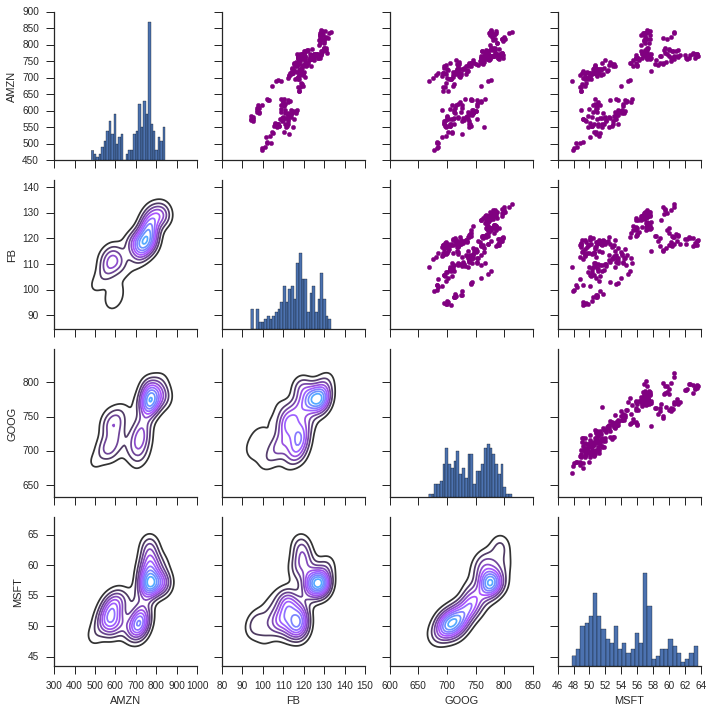

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

/home/irfanalidv/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/irfanalidv/anaconda2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


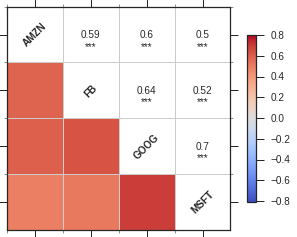

In [33]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

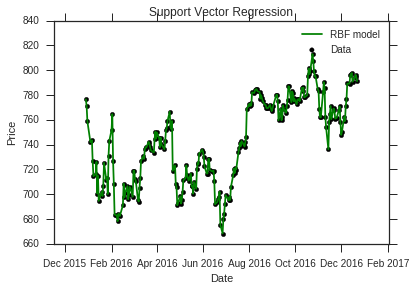

742.977349892


In [34]:
from sklearn.svm import SVR

def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    #Selecting our SVR model
    svr_rbf = SVR(kernel= 'rbf', C=1000, gamma= 0.1) 
    svr_rbf.fit(dates, prices) # fitting the data points in the models
   
    # plotting the initial datapoints
    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    # plotting the line made by the RBF kernel
    plt.plot(dates, svr_rbf.predict(dates), color= 'green', label= 'RBF model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return  svr_rbf.predict(x)[0]

#selecting data for training the model
dates=GOOG['Date'][:250]
prices=GOOG['Adj Close'][:250]

#Calling the function and printing the Predicted price
predicted_price = predict_price(dates, prices, 2016-12-27)
print predicted_price


In [35]:
GOOG.tail()

,Open,High,Low,Close,Volume,Adj Close,Date,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,794.559998,2016-12-21,792.197992,776.650494,778.474198,-0.002335
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,791.260010,2016-12-22,793.681995,778.163995,778.576598,-0.004153
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,789.909973,2016-12-23,793.743994,779.575494,778.810997,-0.001706
2016-12-27,790.679993,797.859985,787.656982,791.549988,789100,791.549988,2016-12-27,793.971991,780.740994,779.071397,0.002076
2016-12-28,793.700012,794.229980,783.200012,785.049988,1132700,785.049988,2016-12-28,792.866992,781.451492,779.173196,-0.008212


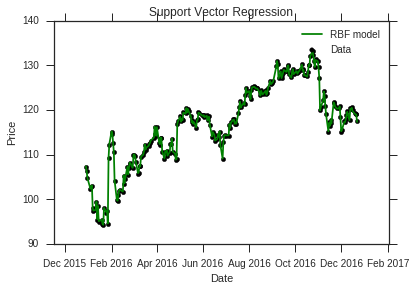

116.898830694


In [36]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    #Selecting our SVR model
    svr_rbf = SVR(kernel= 'rbf', C=1000, gamma= 0.1) 
    svr_rbf.fit(dates, prices) # fitting the data points in the models
   
    # plotting the initial datapoints
    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    # plotting the line made by the RBF kernel
    plt.plot(dates, svr_rbf.predict(dates), color= 'green', label= 'RBF model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return  svr_rbf.predict(x)[0]

dates=FB['Date'][:250]
prices=FB['Adj Close'][:250]

#calling our function and printing the predicted price
predicted_price = predict_price(dates, prices, 2016-12-27)  
print predicted_price

In [37]:
FB.tail()

,Open,High,Low,Close,Volume,Adj Close,Date,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2016-12-21,118.919998,119.199997,118.480003,119.040001,10735800,119.040001,2016-12-21,119.469000,118.939999,122.6776,-0.000420
2016-12-22,118.860001,118.989998,116.930000,117.400002,16222400,117.400002,2016-12-22,119.317999,118.768000,122.4446,-0.013777
2016-12-23,117.000000,117.559998,116.300003,117.269997,10877300,117.269997,2016-12-23,119.076999,118.612500,122.2336,-0.001107
2016-12-27,116.959999,118.680000,116.860001,118.010002,12027700,118.010002,2016-12-27,119.101000,118.492500,122.0362,0.006310
2016-12-28,118.190002,118.250000,116.650002,116.919998,11980200,116.919998,2016-12-28,118.762000,118.294999,121.8238,-0.009237


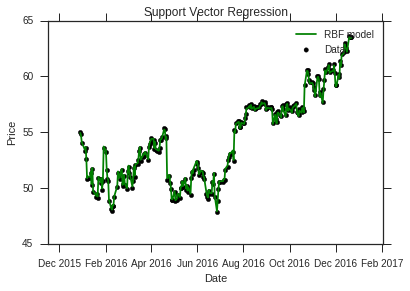

54.4042878178


In [38]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    #Selecting our SVR model
    svr_rbf = SVR(kernel= 'rbf', C=1000, gamma= 0.1) 
    svr_rbf.fit(dates, prices) # fitting the data points in the models
   
    # plotting the initial datapoints
    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    # plotting the line made by the RBF kernel
    plt.plot(dates, svr_rbf.predict(dates), color= 'green', label= 'RBF model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return  svr_rbf.predict(x)[0]

dates=MSFT['Date'][:250]
prices=MSFT['Adj Close'][:250]

predicted_price = predict_price(dates, prices, 2016-12-27)
print predicted_price

In [39]:
MSFT.tail()

,Open,High,Low,Close,Volume,Adj Close,Date,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2016-12-21,63.430000,63.700001,63.119999,63.540001,17071800,63.540001,2016-12-21,62.639,61.4635,59.971588,0.000000
2016-12-22,63.840000,64.099998,63.410000,63.549999,22155200,63.549999,2016-12-22,62.893,61.6210,60.108052,0.000157
2016-12-23,63.450001,63.540001,62.799999,63.240002,12398000,63.240002,2016-12-23,63.020,61.7565,60.242091,-0.004878
2016-12-27,63.209999,64.070000,63.209999,63.279999,11583900,63.279999,2016-12-27,63.131,61.8900,60.366997,0.000632
2016-12-28,63.400002,63.400002,62.830002,62.990002,14247400,62.990002,2016-12-28,63.132,61.9850,60.490076,-0.004583


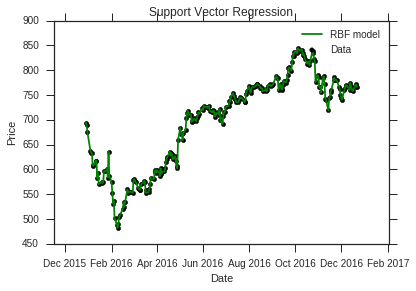

698.054479612


In [40]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1
    
    # defining the support vector regression model
    svr_rbf = SVR(kernel= 'rbf', C=1000, gamma= 0.1)
    
    # fitting the data points in the models
    svr_rbf.fit(dates, prices) 
    
    # plotting the initial datapoints
    plt.scatter(dates, prices, color= 'black', label= 'Data')  
    plt.plot(dates, svr_rbf.predict(dates), color= 'green', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return  svr_rbf.predict(x)[0]#,svr_lin.predict(x)[0], svr_poly.predict(x)[0],

dates=AMZN['Date'][:250]
prices=AMZN['Adj Close'][:250]

predicted_price = predict_price(dates, prices, 2016-5-30)
print predicted_price

In [41]:
AMZN.tail()

,Open,High,Low,Close,Volume,Adj Close,Date,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2016-12-21,770.000000,771.219971,765.700012,770.599976,2040400,770.599976,2016-12-21,766.585999,764.235001,778.373603,-0.000804
2016-12-22,768.119995,771.210022,763.020020,766.340027,2518300,766.340027,2016-12-22,766.487000,763.546002,777.018603,-0.005528
2016-12-23,764.549988,766.500000,757.989990,760.590027,1976900,760.590027,2016-12-23,765.680005,762.557004,775.644803,-0.007503
2016-12-27,763.400024,774.650024,761.200012,771.400024,2627400,771.400024,2016-12-27,766.808008,762.788504,774.613603,0.014213
2016-12-28,776.250000,780.000000,770.500000,772.130005,3279100,772.130005,2016-12-28,766.587006,763.269003,773.797203,0.000946


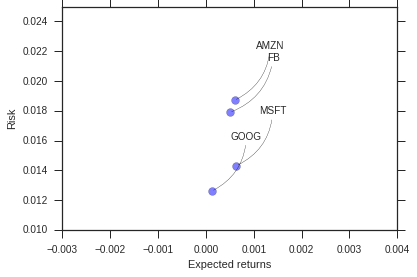

In [42]:
#Risk Analysis
#the most basic ways using the information we've gathered on daily percentage returns is by 
#comparing the expected return with the standard deviation of the daily returns.
# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


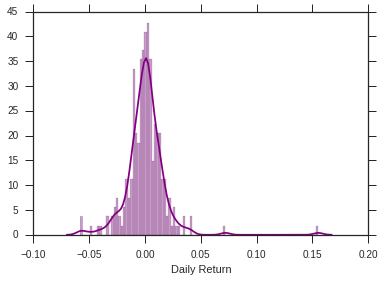

In [43]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

sns.distplot(FB['Daily Return'].dropna(),bins=100,color='purple')

In [44]:
rets['FB'].quantile(0.05)

-0.025694317335499411

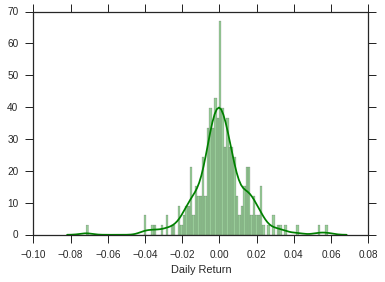

In [46]:
sns.distplot(MSFT['Daily Return'].dropna(),bins=100,color='Green')

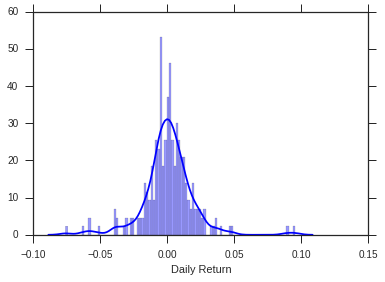

In [47]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='Blue')

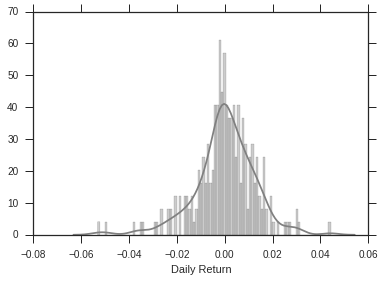

In [49]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='Grey')

In [51]:
####Value at Risk using the Monte Carlo method
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [52]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

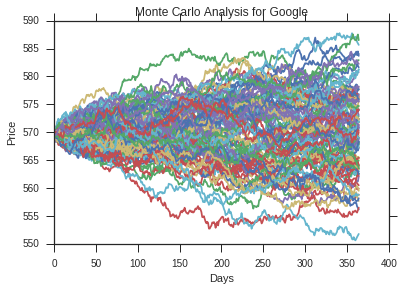

In [53]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [54]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


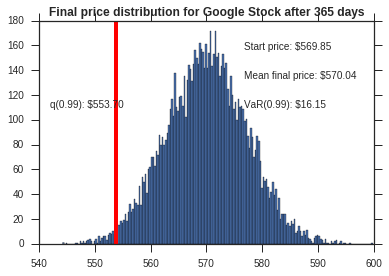

In [55]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');